In [1]:
from util import *

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
import itertools
from  matplotlib.ticker import FuncFormatter

sns.set_theme(style="white", palette="pastel")

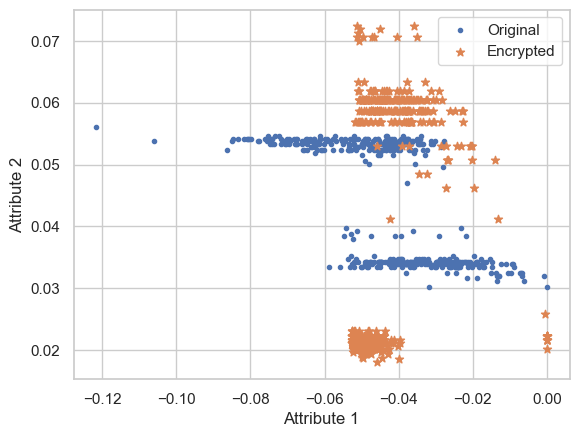

In [11]:
# adv dist
sns.set(font_scale=1.5)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid", palette=None)

ds = read_libsvm('cod-rna')

a, b = 0, 1

xs = [x[a] for x in ds[0]][:500]
ys = [x[b] for x in ds[0]][:500]

plt.scatter(preprocessing.normalize([xs])[0], preprocessing.normalize([ys])[0], marker='.', label='Original')

trans_phase_single(ds, a)
trans_phase_single(ds, b)
trans_ope(ds, mope=False)

xs = [x[a] for x in ds[0]][:500]
ys = [x[b] for x in ds[0]][:500]

plt.scatter(preprocessing.normalize([xs])[0], preprocessing.normalize([ys])[0], marker='*', label='Encrypted')

plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()

plt.savefig(r'D:\work\phase_tree/figure/adv1.pdf')

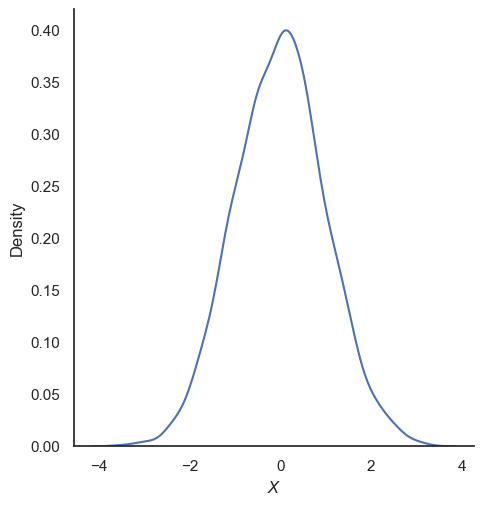

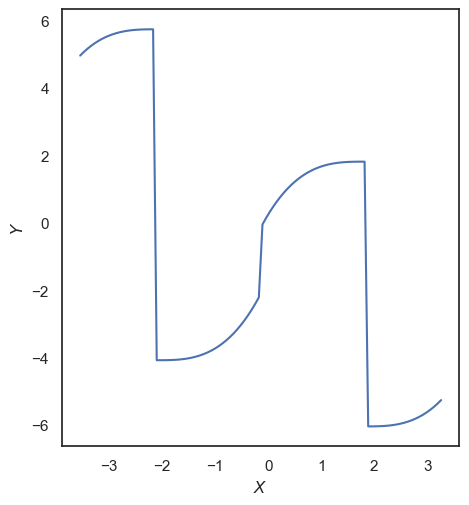

In [2]:
# dist1 2
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(24, 18)})
sns.set_theme(style="white", palette=None)

xs = np.random.normal(size=3000)

fig = sns.displot(xs, kind="kde")
fig.set_axis_labels('$X$')
fig.savefig(r'D:\work\phase_tree/figure/dis1.pdf', bbox_inches='tight')

pa = SplinePhaser(xs, 6)
xx = pa(xs)

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('$X$')
fig.savefig(r'D:\work\phase_tree/figure/dis2.pdf', bbox_inches='tight')

plt.clf()
f = pa.spline
x_new = np.linspace(min(xs), max(xs), 100)
y_new = f(x_new)
fig = sns.lineplot(x=x_new, y=y_new)
fig.set_xlabel('$X$')
fig.set_ylabel('$Y$')
# plt.plot(x_new, y_new)
plt.savefig(r'D:\work\phase_tree/figure/mapping.pdf', bbox_inches='tight')
# plt.show()

In [10]:
plt.savefig(r'D:\work\phase_tree/figure/mapping.pdf', bbox_inches='tight')

<Figure size 1170x827 with 0 Axes>

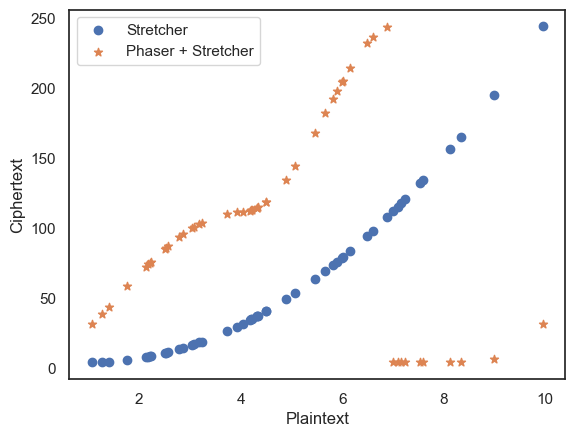

In [3]:
# pole
sns.set(font_scale=1.3)
sns.set_theme(style="white", palette=None)
# xs = np.random.normal(size=3000)
xs = np.random.uniform(1, 10, 50)
xs = sorted(xs)

ope = OPE()
pa = SplinePhaser(xs, 3)

xp = pa(xs)
xx = [ope(pa(x)) for x in xs]
xy =[ope(x) for x in xs]

# fig = sns.lineplot({xs[i]: xx[i] for i in range(len(xx))})
plt.scatter(xs, xy, marker='o', label='Stretcher')
plt.scatter(xs, xx, marker='*', label='Phaser + Stretcher')
plt.xlabel('Plaintext')
plt.ylabel('Ciphertext')
plt.legend()
# fig.set_axis_labels('$X$')
plt.savefig(r'D:\work\phase_tree/figure/pole.pdf', bbox_inches='tight')

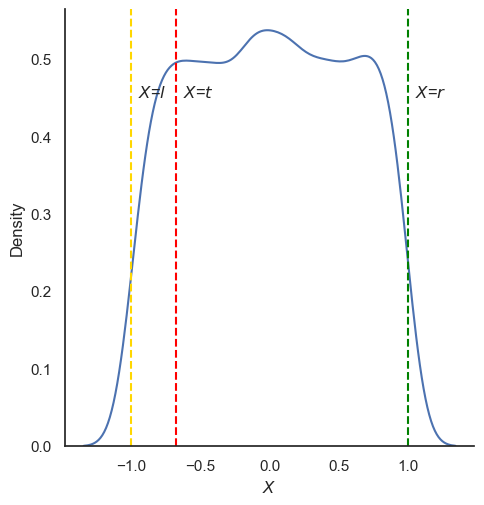

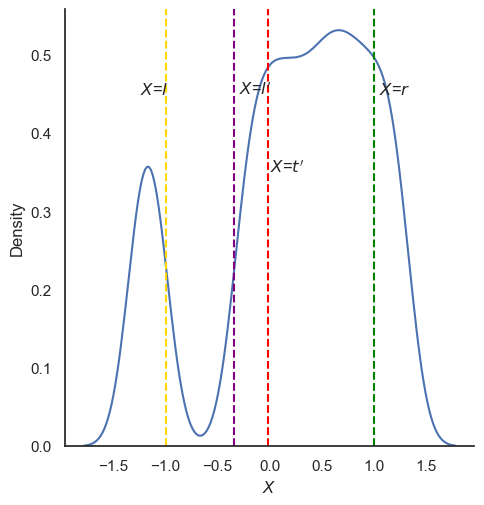

In [2]:
# dist3 4
sns.set(font_scale=1.5)
sns.set_theme(style="white", palette=None)

xs = np.random.uniform(-1, 1, 3000)
l = min(xs)
r = max(xs)
t = random.choice(range(len(xs)))


fig = sns.displot(xs, kind="kde")
fig.set_axis_labels('$X$')

plt.axvline(xs[t], color='red', linestyle='--')
plt.text(xs[t]+0.05, 0.45, f'$X$=$t$')
plt.axvline(l, color='gold', linestyle='--')
plt.text(l+0.05, 0.45, f'$X$=$l$')
plt.axvline(r, color='green', linestyle='--')
plt.text(r+0.05, 0.45, f'$X$=$r$')

fig.savefig(r'D:\work\phase_tree/figure/dis3.pdf', bbox_inches='tight')

pa = Phaser(xs, (max(xs)-min(xs)) * 0.33)
xx = [pa(x) for x in xs]

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('$X$')

plt.axvline(xx[t], color='red', linestyle='--')
plt.text(xx[t]+0.02, 0.35, f'$X$=$t^\prime$')

plt.axvline(l, color='gold', linestyle='--')
plt.text(l-0.25, 0.45, f'$X$=$l$')

plt.axvline(pa(l), color='purple', linestyle='--')
plt.text(pa(l)+0.05, 0.45, f'$X$=$l^\prime$')

plt.axvline(r, color='green', linestyle='--')
plt.text(r+0.05, 0.45, f'$X$=$r$')

fig.savefig(r'D:\work\phase_tree/figure/dis4.pdf', bbox_inches='tight')

In [3]:
def fakeope(A):
    a = sorted(set(A))
    a = {v: k - 12.5 for k, v in enumerate(a)}
    return [a[i] for i in A]

In [5]:
# ope/phaser
sns.set(font_scale=1.5)
sns.set_theme(style="white", palette=None)

iris = datasets.load_iris()
xs = iris.data
ys = iris.target
xx = [x[3] for x in xs]

fig = sns.displot(xx, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c1.pdf', bbox_inches='tight')

ox = fakeope(xx)
fig = sns.displot(ox, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c2.pdf', bbox_inches='tight')

pa = SplinePhaser(xx, 3)
px = pa(xx)
fig = sns.displot(px, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c3.pdf', bbox_inches='tight')

po = fakeope(px)
fig = sns.displot(po, kind="kde")
fig.set_axis_labels('Petal width')
fig.savefig(r'D:/work/phase_tree/figure/c4.pdf', bbox_inches='tight')

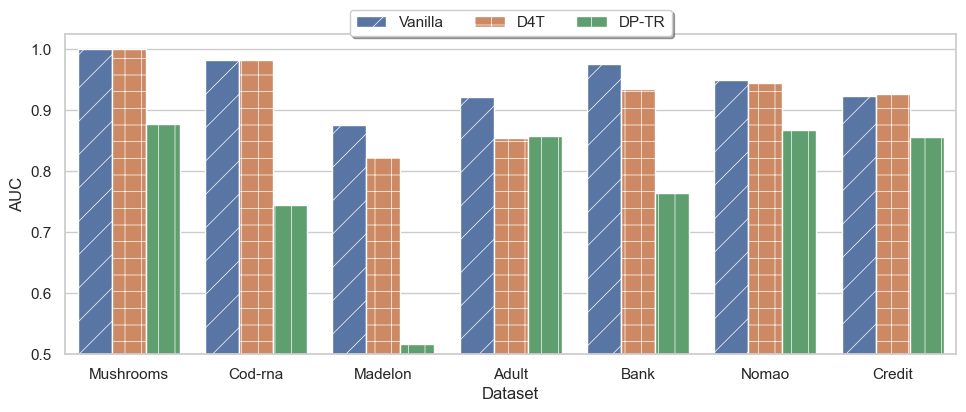

In [24]:
# Phaser vs DP
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(11.5, 4.16)})
sns.set_theme(style="whitegrid", color_codes=True)

dst = ['Mushrooms', 'Cod-rna', 'Madelon', 'Adult', 'Bank', 'Nomao', 'Credit']
_ds = []

for i in dst:
    for _ in range(3):
        _ds.append(i)

aucs = [1.000, 1.000, 0.8766280693903764] + [0.983, 0.982, 0.7447951548627856] + [0.875, 0.824, 0.5174222222222222] + \
       [0.92086, 0.85437, 0.8583462083959835] + [0.97515, 0.93482, 0.7644909019961325] + [0.94952, 0.94403, 0.8669] + [0.92330, 0.92643, 0.8566636851520573]

aucs = [i-0.5 for i in aucs]

df = pd.DataFrame({
    'Dataset':  _ds,
    'Model': ['Vanilla', 'D4T', 'DP-TR'] * len(dst),
    'AUC': aucs,
})

fig = sns.barplot(x="Dataset", y="AUC", hue='Model', data=df, bottom=0.5)
plt.gca().legend().set_title('')

plt.rcParams['hatch.linewidth'] = 0.5

hatches = itertools.cycle(['/', '+', '|'])
for i, bar in enumerate(fig.patches):
    if i % 7 == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)


fig.figure.savefig(r'D:/work/phase_tree/figure/auc1.pdf', bbox_inches='tight')


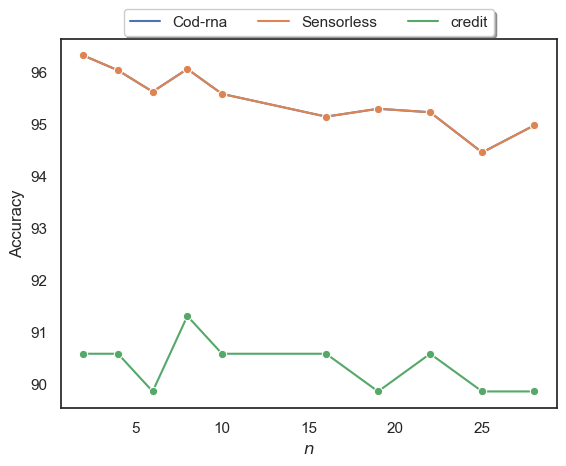

In [12]:
# about n
sns.set(font_scale=1.5)
sns.set_theme(style="white", color_codes=True)

ns = list(range(2, 12, 2)) + list(range(16, 30, 3))

dst = ['Cod-rna', 'Sensorless', 'credit']
_ds = []
for i in dst:
    for _ in range(len(ns)):
        _ds.append(i)

accs = [0.9631309313848997, 0.9602754682119762, 0.9561602418745276, 0.9605274208448812, 0.9557403208196859, 0.9513731418493323, 0.9528848576467625, 0.9522129839590157, 0.9444864365499286, 0.9496934576299656] + \
[0.9631309313848997, 0.9602754682119762, 0.9561602418745276, 0.9605274208448812, 0.9557403208196859, 0.9513731418493323, 0.9528848576467625, 0.9522129839590157, 0.9444864365499286, 0.9496934576299656] + \
[0.9057971014492754, 0.9057971014492754, 0.8985507246376812, 0.9130434782608695, 0.9057971014492754, 0.9057971014492754, 0.8985507246376812, 0.9057971014492754, 0.8985507246376812, 0.8985507246376812]

accs = [i*100 for i in accs]

df = pd.DataFrame({
    'Dataset':  _ds,
    'N': ns * len(dst),
    'AUC': accs,
})

fig = sns.lineplot(data=df, x='N', y='AUC', hue='Dataset', marker='o')

fig.set_xlabel('$n$')
fig.set_ylabel('Accuracy')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

fig.figure.savefig(r'D:/work/phase_tree/figure/n.pdf', bbox_inches='tight')